## Task 4.2

- Explore the mapping data

In [1]:
import os, sys, copy, time
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('./../map_data/')

In [3]:
# load the data
map_data = pd.read_table('./76692_1_120_20221207_125235_dat.txt', sep = '|')
print('Shape of the mapped data is', map_data.shape)
map_data.head()

Shape of the mapped data is (1738585, 23)


co_code        company_name  co_stkdate  bse_opening_price  bse_high_price  \
0   100044  INDUCTO STEEL LTD.  02-04-2018              23.70           23.70   
1   100044  INDUCTO STEEL LTD.  04-04-2018              22.55           22.55   
2   100044  INDUCTO STEEL LTD.  05-04-2018              23.65           23.65   
3   100044  INDUCTO STEEL LTD.  06-04-2018              24.80           24.80   
4   100044  INDUCTO STEEL LTD.  09-04-2018              26.00           26.00   

   bse_low_price  bse_closing_price  bse_returns  bse_traded_qty  \
0          23.70              23.70         1.05             4.0   
1          22.55              22.55         0.95           200.0   
2          23.65              23.65         1.05           235.0   
3          24.80              24.80         1.05           135.0   
4          26.00              26.00         1.05           502.0   

   bse_traded_val  ...  nse_opening_price  nse_high_price  nse_low_price  \
0             0.0  ...                NaN             NaN            NaN   
1             0.0  ...                NaN             NaN            NaN   
2             0.0  ...                NaN             NaN            NaN   
3             0.0  ...                NaN             NaN            NaN   
4             0.0  ...                NaN             NaN            NaN   

   nse_closing_price  nse_returns  nse_traded_qty  nse_traded_val  \
0                NaN          NaN             NaN             NaN   
1                NaN          NaN             NaN             NaN   
2                NaN          NaN             NaN             NaN   
3                NaN          NaN             NaN             NaN   
4                NaN          NaN             NaN             NaN   

   nse_no_of_trans  nse_market_cap  nse_pb  
0              NaN             NaN     NaN  
1              NaN             NaN     NaN  
2              NaN             NaN     NaN  
3              NaN             NaN     NaN  
4              NaN             NaN     NaN  

[5 rows x 23 columns]

In [4]:
# Number of firms(companies)
map_data['company_name'].nunique()

3413

In [5]:
# Necessary variables: co_code, company_name, co_stkdate, 
# bse_closing_price, bse_returns, nse_closing_price, nse_returns, 
map_data = map_data[['co_code', 'company_name', 'co_stkdate', 'bse_closing_price', 'bse_returns', 'nse_closing_price', 'nse_returns']]
print('Shape of the mapped data is', map_data.shape)
map_data.head()

Shape of the mapped data is (1738585, 7)


co_code        company_name  co_stkdate  bse_closing_price  bse_returns  \
0   100044  INDUCTO STEEL LTD.  02-04-2018              23.70         1.05   
1   100044  INDUCTO STEEL LTD.  04-04-2018              22.55         0.95   
2   100044  INDUCTO STEEL LTD.  05-04-2018              23.65         1.05   
3   100044  INDUCTO STEEL LTD.  06-04-2018              24.80         1.05   
4   100044  INDUCTO STEEL LTD.  09-04-2018              26.00         1.05   

   nse_closing_price  nse_returns  
0                NaN          NaN  
1                NaN          NaN  
2                NaN          NaN  
3                NaN          NaN  
4                NaN          NaN

In [6]:
# stockdate should be in datetime format
map_data['co_stkdate'] = pd.to_datetime(map_data['co_stkdate'], format = "%d-%m-%Y", )

In [7]:
# check the info of the data
# map_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738585 entries, 0 to 1738584
Data columns (total 7 columns):
 #   Column             Dtype         
---  ------             -----         
 0   co_code            int64         
 1   company_name       object        
 2   co_stkdate         datetime64[ns]
 3   bse_closing_price  float64       
 4   bse_returns        float64       
 5   nse_closing_price  float64       
 6   nse_returns        float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 92.9+ MB


In [8]:
# Data may be sorted, sort by company_name and stock date column 
map_data.sort_values(by = ['company_name', 'co_stkdate'], ascending = True, inplace = True)
# Take only necessary columns
map_data = map_data[['co_code','company_name','co_stkdate','bse_closing_price','nse_closing_price']]

## Partitioned the data into two time frames:

In [9]:
# Before of before COVID
map_data_before_before_covid = map_data.loc[(map_data['co_stkdate'] >= '2019-01-01') & (map_data['co_stkdate'] <= '2019-06-30')]
map_data_before_before_covid.sort_values(by = ['co_code','company_name', 'co_stkdate'], ascending = True, inplace = True)
map_data_before_before_covid.reset_index(level = -1, drop = True, inplace = True)
map_data_before_before_covid.to_csv('./../data/map_data_before_before_covid.csv')


C:\Users\System Administrator\AppData\Local\Temp\ipykernel_10088\152029358.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data_before_before_covid.sort_values(by = ['co_code','company_name', 'co_stkdate'], ascending = True, inplace = True)


In [11]:
map_data_before_covid = map_data.loc[(map_data['co_stkdate'] >= '2019-07-01') & (map_data['co_stkdate'] <= '2019-12-31')]
map_data_before_covid.sort_values(by = ['co_code','company_name', 'co_stkdate'], ascending = True, inplace = True)
map_data_before_covid.reset_index(level = -1, drop = True, inplace = True)
map_data_before_covid.to_csv('./../data/map_data_before_covid.csv')


C:\Users\System Administrator\AppData\Local\Temp\ipykernel_5008\3711646600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data_before_covid.sort_values(by = ['co_code','company_name', 'co_stkdate'], ascending = True, inplace = True)


In [12]:
map_data_after_covid = map_data.loc[(map_data['co_stkdate'] >= '2020-01-01') & (map_data['co_stkdate'] <= '2020-06-30')]
map_data_after_covid.sort_values(by = ['company_name', 'co_stkdate'], ascending = True, inplace = True)
map_data_after_covid.reset_index(level = -1, drop = True, inplace = True)
map_data_after_covid.to_csv('./../data/map_data_after_covid.csv')

C:\Users\System Administrator\AppData\Local\Temp\ipykernel_5008\2885360529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data_after_covid.sort_values(by = ['company_name', 'co_stkdate'], ascending = True, inplace = True)


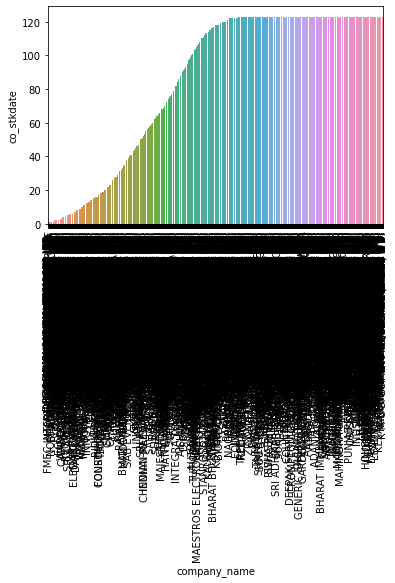

In [51]:
# # Are all firms have same amount of stock data?
# c_stkdata = map_data_before_covid.groupby(by = ['company_name'])['co_stkdate'].count()
# c_stkdata = c_stkdata.reset_index()
# c_stkdata.sort_values(by = ['co_stkdate'], inplace=True)
# # No, all firms don't have same number of stock data
# sns.barplot(x = 'company_name', y = 'co_stkdate', 
#             data = c_stkdata.reset_index())
# plt.xticks(rotation=90);

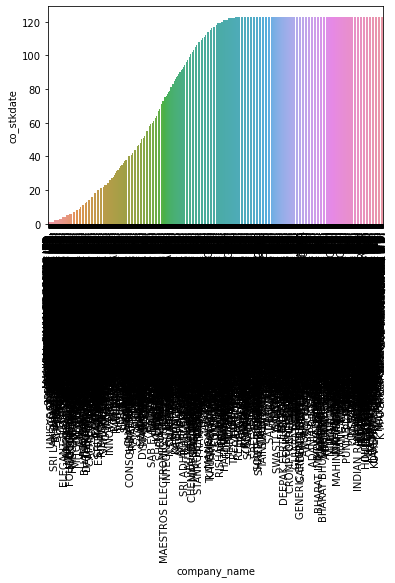

In [52]:
# # Are all firms have same amount of stock data?
# c_stkdata = map_data_after_covid.groupby(by = ['company_name'])['co_stkdate'].count()
# c_stkdata = c_stkdata.reset_index()
# c_stkdata.sort_values(by = ['co_stkdate'], inplace=True)
# # No, all firms don't have same number of stock data
# sns.barplot(x = 'company_name', y = 'co_stkdate', 
#             data = c_stkdata.reset_index())
# plt.xticks(rotation=90);

Before further proceed, we want to make some assumptions:
- We can ignore some companies, who does have less day data.
- Others

In [13]:
# Lets find which firms do not have NSE data
null_nse = map_data[pd.isnull(map_data['nse_closing_price'])]
null_nse_firms = null_nse.groupby(by = ['company_name'])['co_stkdate'].count()
null_nse_firms = null_nse_firms.reset_index()
null_nse_firms

company_name  co_stkdate
0               3P LAND HOLDINGS LTD.          41
1         52 WEEKS ENTERTAINMENT LTD.         640
2                     7NR RETAIL LTD.         505
3            7SEAS ENTERTAINMENT LTD.         190
4                   A & M FEBCON LTD.         487
...                               ...         ...
2096  ZENITH STEEL PIPES & INDS. LTD.           5
2097              ZENLABS ETHICA LTD.         690
2098            ZIM LABORATORIES LTD.         679
2099             ZODIAC VENTURES LTD.         383
2100              ZODIAC-JRD-MKJ LTD.           7

[2101 rows x 2 columns]

In [14]:
null_bse = map_data[pd.isnull(map_data['bse_closing_price'])]
null_bse_firms = null_bse.groupby(by = ['company_name'])['co_stkdate'].count()
null_bse_firms = null_bse_firms.reset_index()
null_bse_firms

company_name  co_stkdate
0                           20 MICRONS LTD.           1
1                             3M INDIA LTD.           1
2                     3P LAND HOLDINGS LTD.         258
3                       5PAISA CAPITAL LTD.          10
4                     A & M JUMBO BAGS LTD.         364
..                                      ...         ...
836  ZICOM ELECTRONIC SECURITY SYSTEMS LTD.          52
837                ZODIAC CLOTHING CO. LTD.          35
838                      ZODIAC ENERGY LTD.         388
839                     ZODIAC-JRD-MKJ LTD.         125
840                   ZOTA HEALTH CARE LTD.         744

[841 rows x 2 columns]

In [15]:
map_data.isnull().sum()

co_code                   0
company_name              0
co_stkdate                0
bse_closing_price    107881
nse_closing_price    750682
dtype: int64

In [17]:
# There are total 1779 firms who has atleast one null values for nse
# There are total 740 firms who has atleast one null values for bse
# Now we need to decide a thresold of null values to choose the data 
# from which stock-exchange. (Our priority is NSE)
np.quantile(null_nse_firms['co_stkdate'], q = 0.5)

321.0

In [18]:
null_nse_firms[null_nse_firms['co_stkdate'] < 180]

company_name  co_stkdate
0                  3P LAND HOLDINGS LTD.          41
5     A A R COMMERCIAL CO. LTD. [MERGED]           6
8                    A C E EDUTREND LTD.         137
16                      A K I INDIA LTD.          94
17            A K M LACE & EMBROTEX LTD.          19
...                                  ...         ...
2088                      YUG DECOR LTD.         109
2090         YURANUS INFRASTRUCTURE LTD.         104
2094                 ZENITH EXPORTS LTD.           6
2096     ZENITH STEEL PIPES & INDS. LTD.           5
2100                 ZODIAC-JRD-MKJ LTD.           7

[763 rows x 2 columns]

In [21]:
map_data.head()

co_code     company_name co_stkdate  bse_closing_price  \
69292       11  20 MICRONS LTD. 2018-04-02              49.60   
69293       11  20 MICRONS LTD. 2018-04-03              50.00   
69294       11  20 MICRONS LTD. 2018-04-04              49.60   
69295       11  20 MICRONS LTD. 2018-04-05              50.00   
69296       11  20 MICRONS LTD. 2018-04-06              49.25   

       nse_closing_price  
69292              49.75  
69293              49.90  
69294              49.30  
69295              49.95  
69296              49.45

In [22]:
firms_nse = map_data[['co_code', 'company_name', 'co_stkdate', 'nse_closing_price']]

In [23]:
firms_nse = firms_nse.dropna()
np.sum(firms_nse.groupby(by = ['company_name'])['co_stkdate'].count() < 150)

62

In [24]:
firms_nse.to_csv('./../data/firms_nse.csv')

In [69]:
micron_ltd = firms_nse[firms_nse['company_name'].str.contains('MICRONS LTD.')]
micron_ltd.reset_index(inplace=True)
micron_ltd

index  co_code     company_name co_stkdate  nse_closing_price  \
0    41393       11  20 MICRONS LTD. 2019-01-01              44.25   
1    41394       11  20 MICRONS LTD. 2019-01-02              44.05   
2    41395       11  20 MICRONS LTD. 2019-01-03              43.45   
3    41396       11  20 MICRONS LTD. 2019-01-04              42.25   
4    41397       11  20 MICRONS LTD. 2019-01-07              42.65   
..     ...      ...              ...        ...                ...   
553  41946       11  20 MICRONS LTD. 2021-03-24              35.20   
554  41947       11  20 MICRONS LTD. 2021-03-25              33.95   
555  41948       11  20 MICRONS LTD. 2021-03-26              34.50   
556  41949       11  20 MICRONS LTD. 2021-03-30              34.75   
557  41950       11  20 MICRONS LTD. 2021-03-31              35.15   

     nse_returns  
0         1.0500  
1         1.0000  
2         0.9900  
3         0.9700  
4         1.0100  
..           ...  
553       0.9737  
554       0.9645  
555       1.0162  
556       1.0072  
557       1.0115  

[558 rows x 6 columns]